In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('C:\Tugas4_A_11682\credit_card.csv')
credit.head(20)

<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
C:\Users\andre\AppData\Local\Temp\ipykernel_24504\2327144703.py:9: SyntaxWarning: invalid escape sequence '\T'
  credit = pd.read_csv('C:\Tugas4_A_11682\credit_card.csv')


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [2]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head(50)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

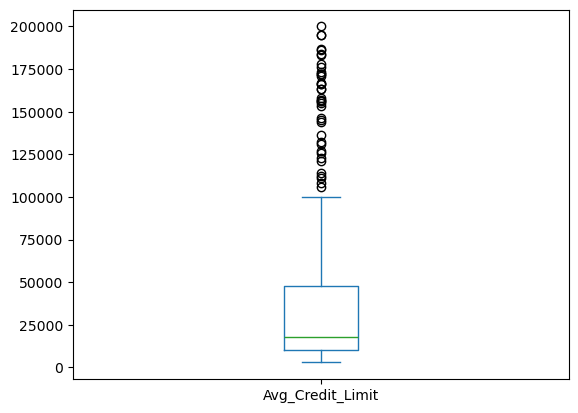

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

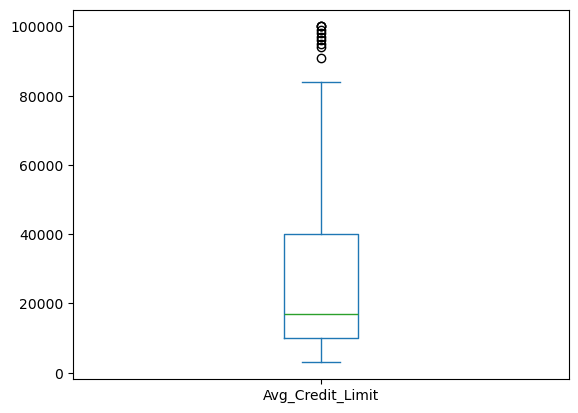

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    
    if is_numeric_dtype(data_frame[kolom_outlier]):
        
        Q1 = data_frame[kolom_outlier].quantile(0.25)
        Q3 = data_frame[kolom_outlier].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data_bersih = data_frame[(data_frame[kolom_outlier] >= lower_bound) & (data_frame[kolom_outlier] <= upper_bound)]
        return data_bersih
    else:
        print(f"Kolom {kolom_outlier} bukan numerik.")
        return data_frame

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')


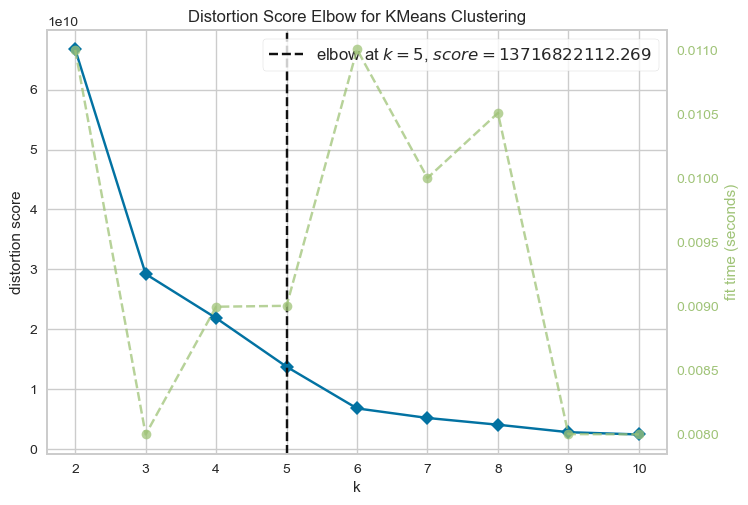

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=82)
vis = KElbowVisualizer(kMeansC, k=(2,11))

vis.fit(data_bersih)

vis.show()

Silhouette Score K-Means for 2 clusters: 0.7275517813087928
Silhouette Score K-Means for 3 clusters: 0.7077390094589705
Silhouette Score K-Means for 4 clusters: 0.5823131527430695
Silhouette Score K-Means for 5 clusters: 0.5882909120988336
Silhouette Score K-Means for 6 clusters: 0.6271336425919736
Silhouette Score K-Means for 7 clusters: 0.6180001181346965
Silhouette Score K-Means for 8 clusters: 0.5918608587737609
Silhouette Score K-Means for 9 clusters: 0.6074689966357256
Silhouette Score K-Means for 10 clusters: 0.5986419093320154


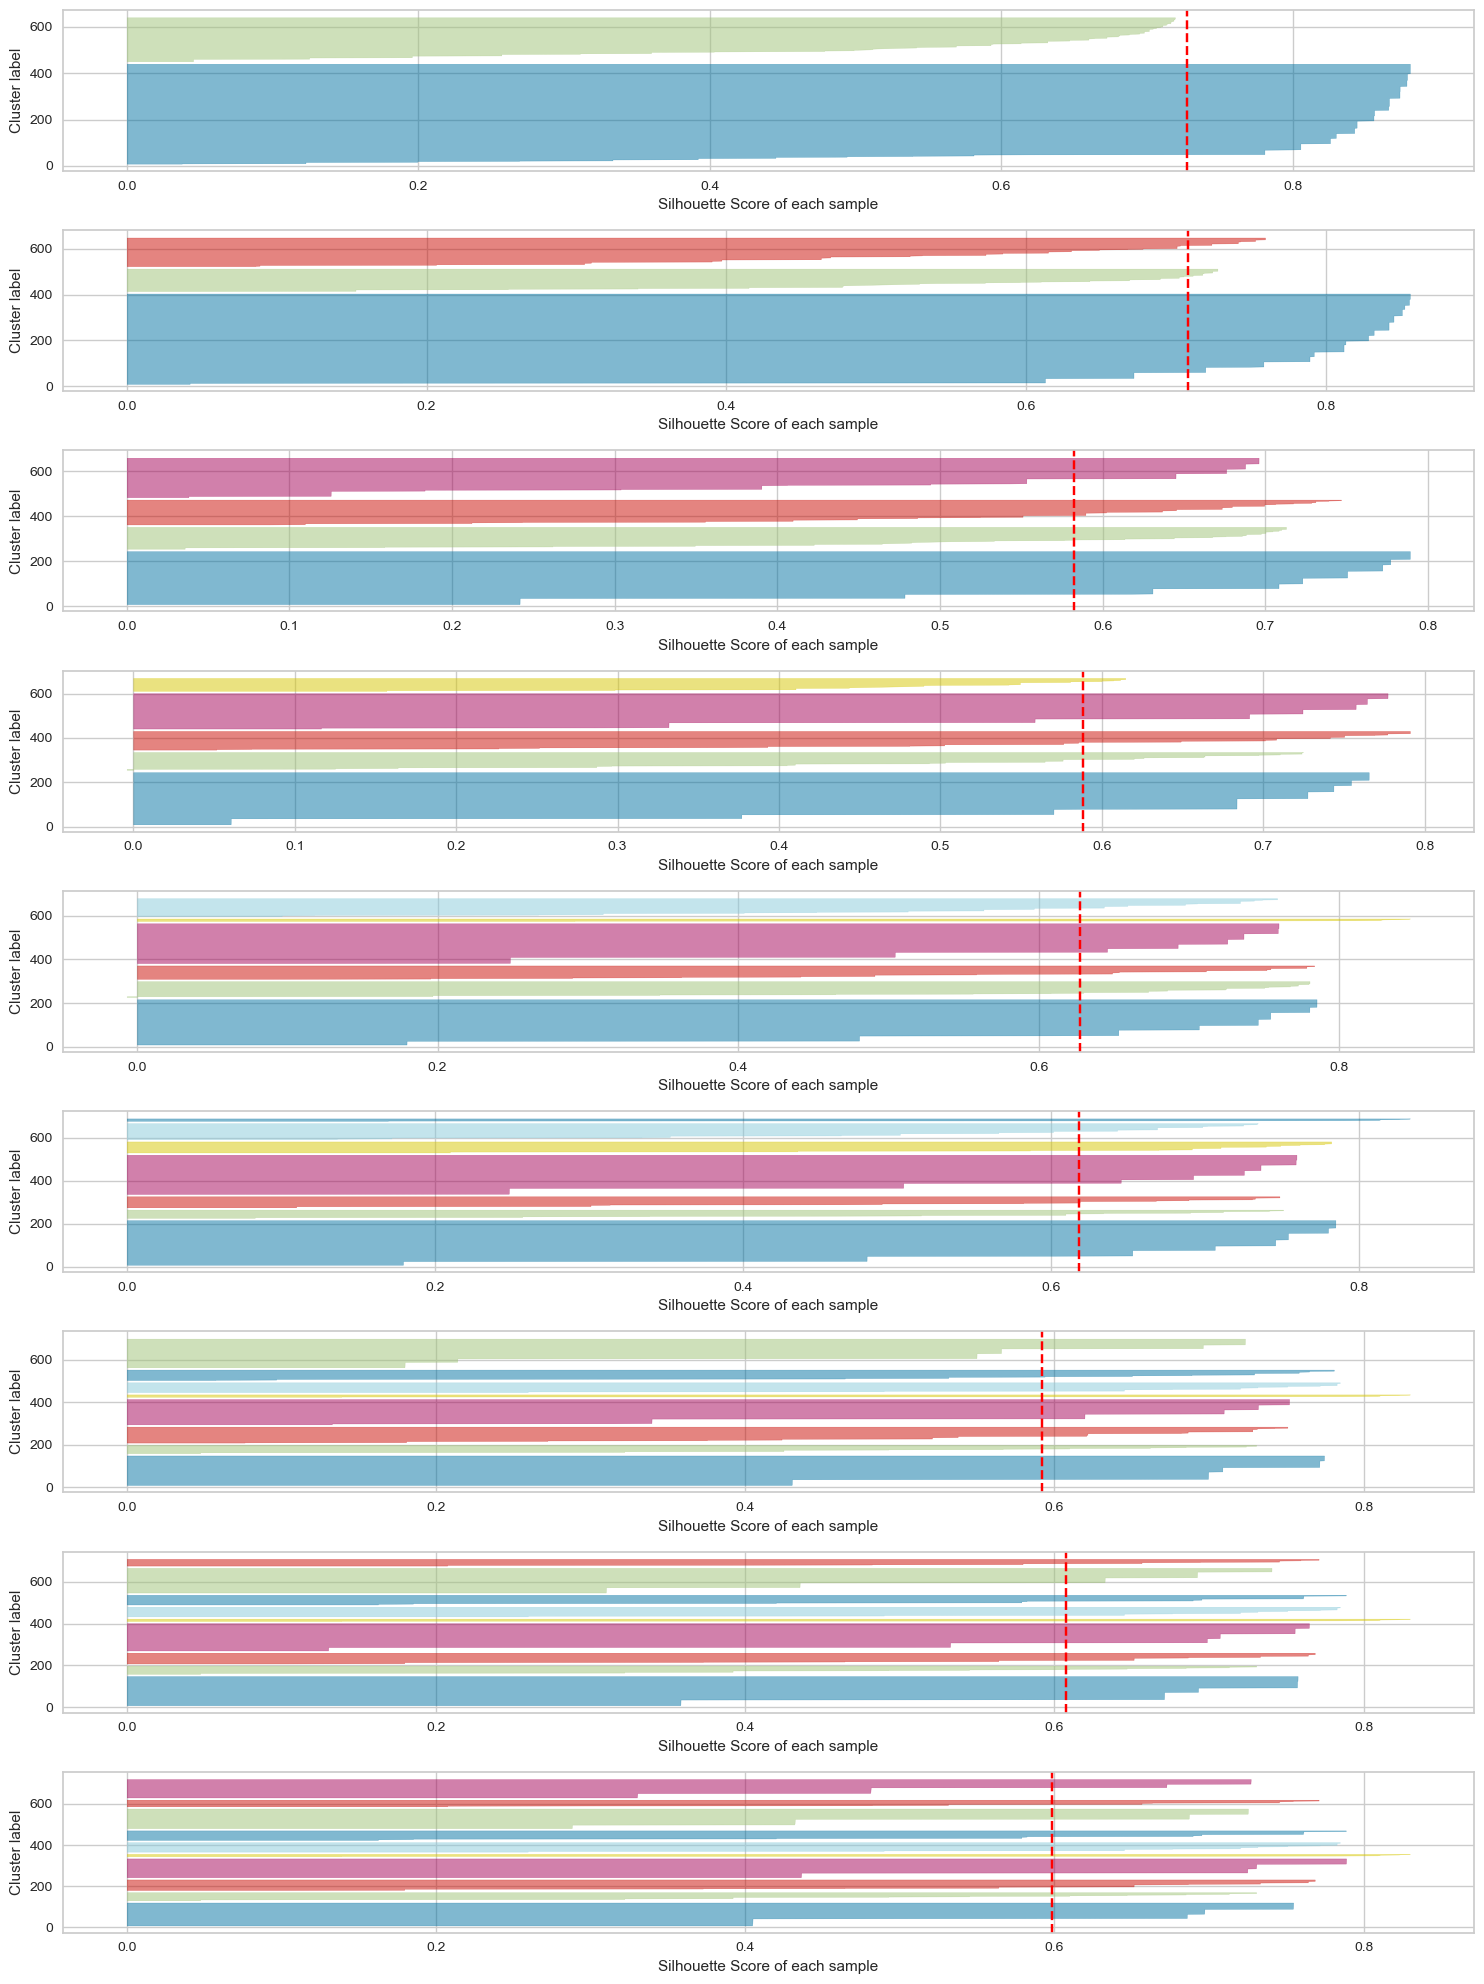

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2, 11):

    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=82)
    
    KM_clusters = kMeansC.fit_predict(data_bersih)
    
    print("Silhouette Score K-Means for", k, "clusters:", silhouette_score(data_bersih, KM_clusters))
    
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)
    
    ax[k-2].set(xlabel="Silhouette Score of each sample", ylabel="Cluster label")

plt.tight_layout()
plt.show()

In [11]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

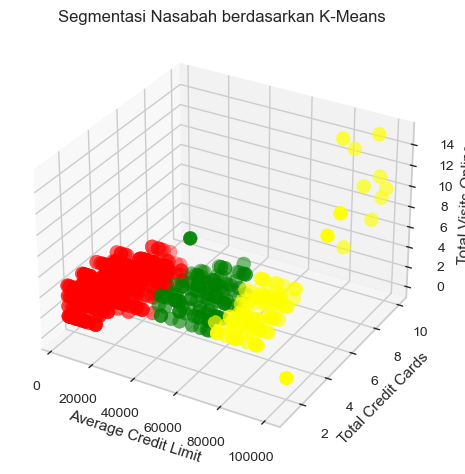

Silhouette Score K-Means: 0.708


In [17]:
kMeansC = KMeans(n_clusters=3, init='k-means++', random_state=82)
KM_clusters = kMeansC.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_color = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4:'magenta', 5:'black', 6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_color[i] for i in KM_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, KM_clusters))

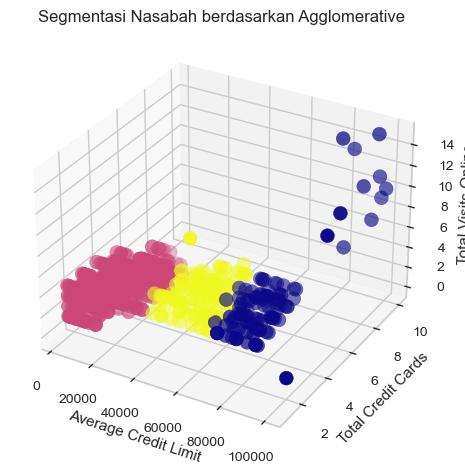

Slihoutter Score K-Means: 0.705


In [18]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Slihoutter Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))

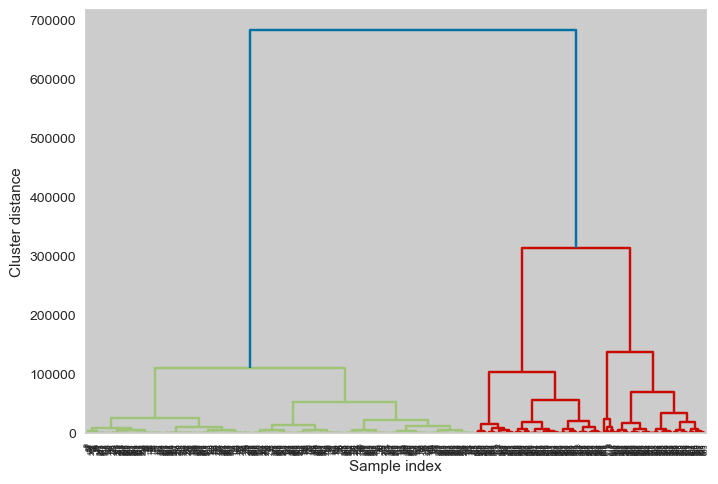

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

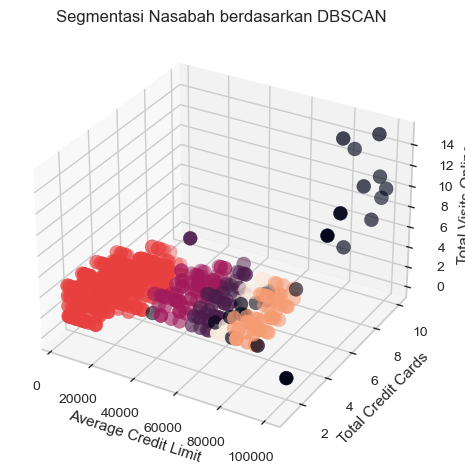

Silhouette Score K-Means: 0.657


In [23]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih[ 'Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [26]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kMeansC),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
